In [ ]:
!pip3 install pennylane
!pip3 install scipy
!pip3 install numpy
!pip3 install matplotlib


## PennyLane Software Demo
### 1. Optimizing a Circuit

In [103]:
import matplotlib.pyplot as plt
import pennylane as qml
from pennylane import numpy as np

dev = qml.device("lightning.qubit", wires=1)

# Define the quantum node (qnode) that encapsulates the quantum circuit
@qml.qnode(dev)
def circuit(theta):
    qml.PauliY(wires=0)  
    qml.RY(theta, wires=0)
    return qml.expval(qml.PauliZ(0))
print(qml.draw(circuit)(0.1))

0: ──Y──RY(0.10)─┤  <Z>


In [63]:
thetas = np.linspace(-np.pi, np.pi, 50)
measurements = [circuit(theta) for theta in thetas]

### Visualization of Expectation Values
We plot how the expectation value of PauliZ changes as we vary `theta` from -π to π.


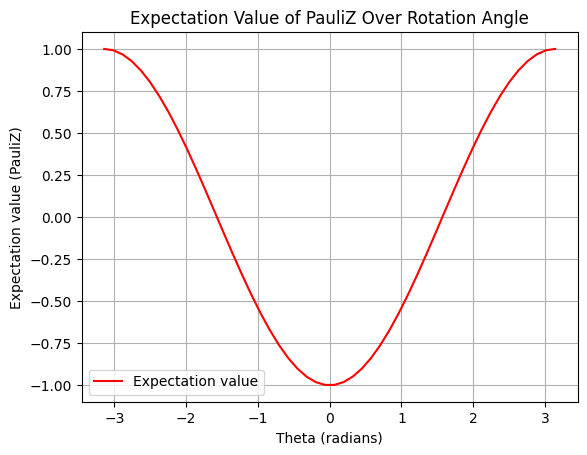

In [64]:
fig, ax = plt.subplots()
ax.plot(thetas, measurements, label='Expectation value', color='red')
ax.set_title('Expectation Value of PauliZ Over Rotation Angle')
ax.set_xlabel('Theta (radians)')
ax.set_ylabel('Expectation value (PauliZ)')
ax.grid(True)
ax.legend()
plt.show()

Let's begin the experiment to optimize! 

### Optimization Using Gradient Descent

We optimize the parameter `theta` to minimize the cost, which is the negative of the circuit's output.


In [76]:
theta = np.array([3.14], requires_grad=True)

In [73]:
opt = qml.GradientDescentOptimizer(stepsize=0.1)

In [77]:
n_iter = 200
for it in range(n_iter):
    theta, prev_cost = opt.step_and_cost(circuit, theta)  #Update trainable arguments with one step of the optimizer and return the corresponding objective function value prior to the step.
    if it % 20 == 0:
        print("Theta: ", theta, "Cost: ", circuit(theta))

Theta:  [3.13984073] Cost:  0.999998465390509
Theta:  [3.12980673] Cost:  0.999930546864482
Theta:  [3.06233803] Cost:  0.9968609960119321
Theta:  [2.61875505] Cost:  0.8664057370024723
Theta:  [0.95725236] Cost:  -0.5757686620564328
Theta:  [0.12765812] Cost:  -0.9918627616453629
Theta:  [0.01554457] Cost:  -0.9998791855314813
Theta:  [0.0018899] Cost:  -0.9999982141371826
Theta:  [0.00022977] Cost:  -0.9999999736033449
Theta:  [2.79344187e-05] Cost:  -0.9999999996098342


### 2. Grover's Algorithm

Provides a quadratic speedup for unsorted database searching. Essentially, it allows for finding a target element in an unordered list or database of 
𝑁 elements in 𝑂(sqrt(𝑁)) time, compared to 𝑂(𝑁) time required by classical algorithms.

Grover’s algorithm uses a special quantum operation called an "oracle". The oracle is a function that returns a special value (flipped sign) for only the solution.
1. Create Uniform Superposition
2. Apply the Oracle
3. Apply the Grover operator (to amplify the probability of the flipped)

#### The Oracle as a Unitary Operator

The quantum oracle is represented by a unitary operator U<sub>ω</sub>. This operator works in a very specific way:

- For the state corresponding to our desired answer (let’s denote this state as |ω⟩), the oracle flips the sign of the state. So, if U<sub>ω</sub> is applied to |ω⟩, it transforms it to -|ω⟩.
- For all other states, which do not represent the answer, the operator leaves them unchanged.

This behavior can be mathematically expressed as:

- \( U<sub>ω</sub>|x⟩ = -|x⟩ \) for \( x = ω \) (where the function \( f(x) = 1 \))
- \( U<sub>ω</sub>|x⟩ = |x⟩ \) for \( x ≠ ω \) (where the function \( f(x) = 0 \))

#### Reflection About the State

The unitary operation \( U<sub>ω</sub> \) can also be described using the formula:

 U<sub>ω</sub> = I - 2|ω⟩⟨ω| 

Here:
- \( I \) is the identity matrix, which effectively does nothing to a state when applied.
- \( 2|ω⟩⟨ω|\) is a projection operator that projects any state onto |ω⟩ , then scales it by 2.

This formula tells us that U<sub>ω</sub>  subtracts twice the projection of any state onto |ω⟩ from the state itself. For the state \( |ω⟩ \), this subtraction flips its sign.
For any state orthogonal (i.e., not sharing any component) to \( |ω⟩ \), it has no effect.

Initial state |00>: [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
After flipping it: [-1.+0.j  0.+0.j  0.+0.j  0.+0.j]
execution_results: [-1.+0.j  0.+0.j  0.+0.j  0.+0.j]


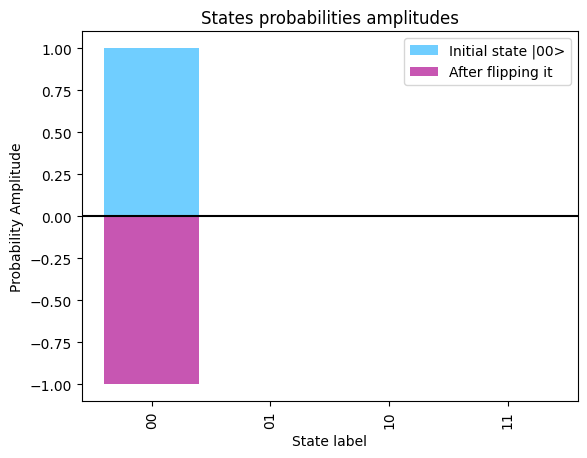

In [20]:
dev = qml.device("default.qubit", wires=NUM_QUBITS)

@qml.qnode(dev)
def circuit():
    qml.Snapshot("Initial state |00>")
    # Flipping the marked state
    qml.FlipSign([0, 0], wires=wires)
    qml.Snapshot("After flipping it")
    return qml.state()

results = qml.snapshots(circuit)()

for k, result in results.items():
    print(f"{k}: {result}")

y1 = np.real(results["Initial state |00>"])
y2 = np.real(results["After flipping it"])

bit_strings = [f"{x:0{NUM_QUBITS}b}" for x in range(len(y))]

plt.bar(bit_strings, y1, color = "#70CEFF")
plt.bar(bit_strings, y2, color = "#C756B2")

plt.xticks(rotation="vertical")
plt.xlabel("State label")
plt.ylabel("Probability Amplitude")
plt.title("States probabilities amplitudes")

plt.legend(["Initial state |00>", "After flipping it"])
plt.axhline(y=0.0, color="k", linestyle="-")
plt.show()

### The Inheritance Problem

There exists a number of properties that need to divided evenly between two siblings. 

In this example, there are 6 different properties, with the objective of dividing them into two sets of the same value. 

x_i = 0 or 1, depending on whether the property goes to the first or second sibling. 

In [110]:
property_prices = [7, 8, 6, 4, 9, 14] # in 100 thousands USD

In [111]:
variable_wires = [0, 1, 2, 3, 4, 5]
aux_oracle_wires = [6, 7, 8, 9, 10, 11]

def oracle(variable_wires, aux_oracle_wires):
    def add_k_fourier(k, wires):
        for j in range(len(wires)):
            qml.RZ(k * np.pi / (2 ** j), wires = wires[j])
    def value_second_sibling():
        qml.QFT(wires = aux_oracle_wires)
        for wire in variable_wires: ##Each wire in this context represents a binary decision variable indicating whether a property (with a specific price) is assigned to the second sibling or not.
            qml.ctrl(add_k_fourier, control = wire)( ##: This is a controlled operation. The function add_k_fourier is applied to the qubits specified by aux_oracle_wires only if the control qubit (in variable_wires) is in the state |1⟩ (indicating that the corresponding property is assigned to the second sibling).
                property_prices[wire],
                wires = aux_oracle_wires
            )
        qml.adjoint(qml.QFT)(wires = aux_oracle_wires)
    value_second_sibling()
    qml.FlipSign( ## flipping the sign of half of the total price (Marking the solution)
        sum(property_prices) // 2,
        wires = aux_oracle_wires
    )
    qml.adjoint(value_second_sibling)()
    

**add_k_fourier**: This function applies a rotation to the qubits based on their index and a parameter k. It modifies the phase of the qubit states to encode the value of the property in the phase space using quantum Fourier transform (QFT) principles.

**value_second_sibling**: This function computes the cumulative value of properties assigned to one of the siblings based on the current quantum state of variable_wires. It uses the Quantum Fourier Transform (QFT) to perform arithmetic operations in the quantum domain.

The QFT is used for changing the basis of quantum states into the Fourier (frequency) domain. In this context, it prepares the auxiliary wires to facilitate arithmetic operations in the frequency domain, which can simplify the process of adding values.

In [112]:
dev = qml.device("default.qubit", wires = variable_wires + aux_oracle_wires, shots = 1)

@qml.qnode(dev)
def circuit():
    for wire in variable_wires:
        qml.Hadamard(wires = wire)

    for _ in range(3):
        oracle(variable_wires, aux_oracle_wires)
        qml.GroverOperator(wires = variable_wires)

    return qml.sample(wires = variable_wires)

In [113]:
values = circuit()
# plt.bar(range(len(values)), values)
print(values)

[1 1 0 0 1 0]


We can confirm that if the properties are split like above, their values would be:

In [ ]:
Sibling 1: (6, 4, 14), sum = 24

Sibling 2: (7, 8, 9), sum = 24

References:

https://pennylane.ai/qml/demos/tutorial_qft/

https://pennylane.ai/blog/2021/05/how-to-visualize-quantum-circuits-in-pennylane/

https://www.youtube.com/watch?v=42aa-Ve5WmI

https://www.youtube.com/watch?v=EfUfwVnicP8
